In [50]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

UIC = pd.read_csv('merged_data_UIC.csv')
UIUC = pd.read_csv('merged_data_UIUC.csv')
NIU = pd.read_csv('merged_data_NIU.csv')
ISU = pd.read_csv('merged_data_ISU.csv')
SIU = pd.read_csv('merged_data_SIU.csv')

#Remove rows where "Published on" is not between 2013 and 2022
for df in [UIC, UIUC, NIU, ISU, SIU]:
    df['Published on'] = pd.to_datetime(df['Published on'], errors='coerce')
    df = df[(df['Published on'] >= '2011-01-01') & (df['Published on'] < '2023-01-01')]

# Remove rows where cited by date is not between 2013 and 2022
for df in [UIC, UIUC, NIU, ISU, SIU]:
    df['Cited by date'] = pd.to_datetime(df['Cited by date'], errors='coerce')
    df = df[(df['Cited by date'] >= '2011-01-01') & (df['Cited by date'] < '2023-01-01')]

#Drop cited by title which do not have titles.

for df in [UIC, UIUC, NIU, ISU, SIU]:
    df = df.dropna(subset=['Cited by title'])
    
#Drop those entry which have an unknown citation date.

for df in [UIC, UIUC, NIU, ISU, SIU]:
    df['Cited by date'] = df['Cited by date'].replace('an unknown date', pd.NaT)
    df.dropna(subset=['Cited by date'], inplace=True)
    df['Cited by year'] = pd.DatetimeIndex(df['Cited by date']).year

#fill the empty entry in Article funder(s) as Not funded
#replace other entry as Funded

for df in [UIC, UIUC, NIU, ISU, SIU]:
    df["Article funder(s)"] = df["Article funder(s)"].fillna("Not Funded")
    df["Article funder(s)"] = df["Article funder(s)"].apply(lambda x: "Funded" if x != "Not Funded" else x)

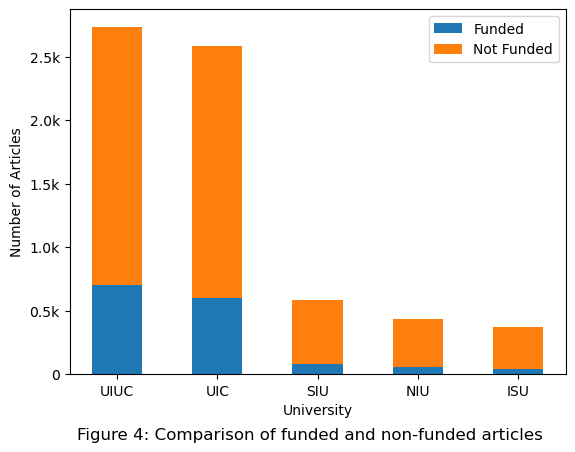

In [51]:
import matplotlib.ticker as ticker
# drop duplicates based on Title column
df_uic = UIC.drop_duplicates(subset=['Title'])
df_uiuc = UIUC.drop_duplicates(subset=['Title'])
df_niu = NIU.drop_duplicates(subset=['Title'])
df_isu = ISU.drop_duplicates(subset=['Title'])
df_siu = SIU.drop_duplicates(subset=['Title'])

# count the number of funded and not funded articles for each university
uic_counts = df_uic['Article funder(s)'].value_counts()
uiuc_counts = df_uiuc['Article funder(s)'].value_counts()
niu_counts = df_niu['Article funder(s)'].value_counts()
isu_counts = df_isu['Article funder(s)'].value_counts()
siu_counts = df_siu['Article funder(s)'].value_counts()

# combine the counts into a single DataFrame
counts = pd.DataFrame({
    'University': ['UIC', 'UIUC', 'NIU', 'ISU', 'SIU'],
    'Funded': [uic_counts['Funded'], uiuc_counts['Funded'], niu_counts['Funded'], isu_counts['Funded'], siu_counts['Funded']],
    'Not Funded': [uic_counts['Not Funded'], uiuc_counts['Not Funded'], niu_counts['Not Funded'], isu_counts['Not Funded'], siu_counts['Not Funded']]
})

# calculate the total number of articles for each university
counts['Total'] = counts['Funded'] + counts['Not Funded']

# sort the universities by total number of articles
counts = counts.sort_values('Total', ascending=False)

# create a bar graph for all universities in ascending order
fig, ax = plt.subplots()
ax.bar(counts['University'], counts['Funded'], width=0.5, label='Funded')
ax.bar(counts['University'], counts['Not Funded'], bottom=counts['Funded'], width=0.5, label='Not Funded')


ax.set_xlabel('University')
ax.set_ylabel('Number of Articles')

# Set the title at the bottom of the graph
plt.suptitle("Figure 4: Comparison of funded and non-funded articles", y=0.01)

# Adjust spacing for title at the bottom
plt.subplots_adjust(bottom=0.12)

ax.legend()
#plt.yscale('log')
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, pos: f'{int(y):,}' if y < 500 else f'{y/1000:.1f}k'))
plt.show()


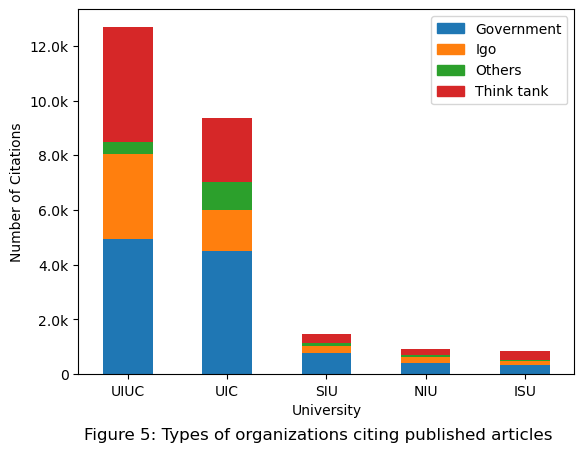

In [52]:
# Define a list of colors for the 'Cited by type' categories
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']

# Assign 'University' column to each individual DataFrame
UIC['University'] = 'UIC'
UIUC['University'] = 'UIUC'
NIU['University'] = 'NIU'
ISU['University'] = 'ISU'
SIU['University'] = 'SIU'

# Combine the five DataFrames into a single one
df = pd.concat([UIC, UIUC, NIU, ISU, SIU], ignore_index=True)

# Group the data by university and cited by type, and calculate the count
grouped = df.groupby(['University', 'Cited by type']).size().reset_index(name='Count')

# Create a pivot table to stack the 'Cited by type' column
pivoted = grouped.pivot(index='University', columns='Cited by type', values='Count')

# Sort the data by the total count for each university
totals = pivoted.sum(axis=1)
sorted_totals = totals.sort_values(ascending=False)
pivoted = pivoted.reindex(index=sorted_totals.index)

# Create a stacked bar chart for each university
#ax = pivoted.plot(kind='bar', stacked=True, color=colors)
ax = pivoted.plot(kind='bar', stacked=True, color=colors, width=0.5)
# Set the title and labels for the chart
plt.xlabel('University')
plt.ylabel('Number of Citations')
plt.xticks(rotation=0)

# Set the title at the bottom of the graph
plt.suptitle("Figure 5: Types of organizations citing published articles", y=0.01)

# Adjust spacing for title at the bottom
plt.subplots_adjust(bottom=0.12)
# Add a legend and show the chart

import matplotlib.patches as mpatches
yes1_instance = mpatches.Patch(color='#1f77b4', label='Government')
no1_instance = mpatches.Patch(color='#ff7f0e', label='Igo')
yes2_instance = mpatches.Patch(color='#2ca02c', label='Others')
no2_instance = mpatches.Patch(color='#d62728', label='Think tank')

plt.legend(handles=[yes1_instance, no1_instance, yes2_instance, no2_instance])
#plt.legend()
#plt.yscale('log')
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, pos: f'{int(y):,}' if y < 500 else f'{y/1000:.1f}k'))
plt.show()

  University  Citation lag
0        ISU      3.267894
1        NIU      3.346677
2        SIU      3.016219
3        UIC      2.282795
4       UIUC      2.035108


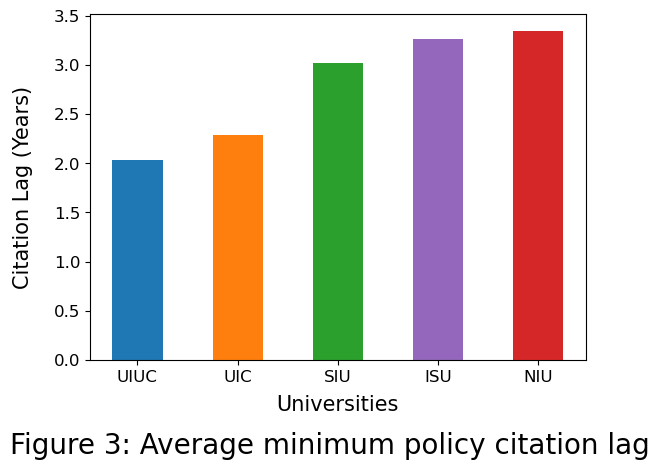

In [53]:
#datasets = [UIC, UIUC, NIU, SIU, ISU]
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#9467bd', '#d62728']

#combine all datasets into one DataFrame
combined_df = pd.concat([UIC, UIUC, NIU, SIU, ISU])

#convert 'Cited by date' column to the timezone format of 'Published on' column
combined_df['Cited by date'] = pd.to_datetime(combined_df['Cited by date']).dt.tz_localize('UTC').dt.tz_convert('US/Central')

#calculate the citation lag for each row in years
combined_df['Citation lag'] = (combined_df['Cited by date'] - combined_df['Published on']).dt.days / 365

#group by Title and university and calculate the minimum citation lag for each Title
title_univ_lag = combined_df.groupby(['Title', 'University'])['Citation lag'].min().reset_index()

#group by university and calculate the average of the minimum citation lag for each Title
univ_mean_lag = title_univ_lag.groupby('University')['Citation lag'].mean().reset_index()
print(univ_mean_lag)
# sort the universities in ascending order of their average minimum citation lag
univ_mean_lag = univ_mean_lag.sort_values('Citation lag', ascending=True)

#Create a bar plot of the average minimum citation lag for each university
plt.bar(univ_mean_lag['University'], univ_mean_lag['Citation lag'], color=colors, width=0.5)
plt.xlabel("Universities", fontsize=15, labelpad=7)
plt.ylabel("Citation Lag (Years)", fontsize=15, labelpad=15)
plt.xticks(rotation=0, fontsize=12)
plt.yticks(fontsize=12)
plt.suptitle("Figure 3: Average minimum policy citation lag", y=0.01, fontsize=20)

# Adjust spacing for title at the bottom
plt.subplots_adjust(bottom=0.16)
plt.show()

#colors = ['#ff7f0e', '#1f77b4', '#d62728', '#2ca02c', '#9467bd']

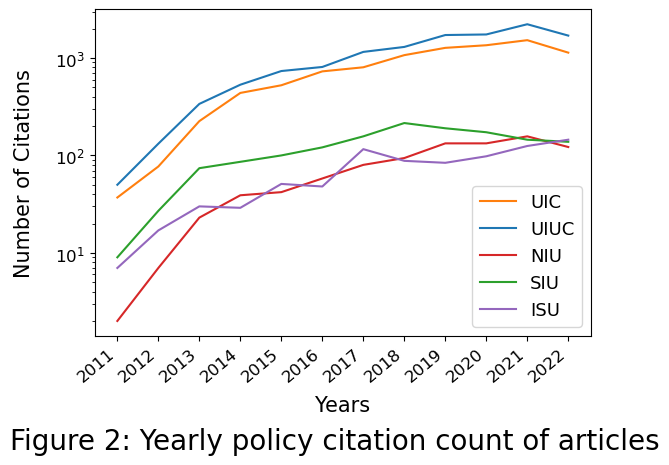

In [54]:
#Figure:2

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Create a list of all the datasets
datasets = [UIC, UIUC, NIU, SIU, ISU]
colors = ['#ff7f0e', '#1f77b4', '#d62728', '#2ca02c', '#9467bd']
#colors = ['#9467bd', '#d62728', '#2ca02c', '#ff7f0e', '#1f77b4']
i=0
# Create a line graph for each dataset
for df in datasets:
    # Filter the data to only include the years 2013 to 2022
    df_filtered = df[(df['Cited by year'] >= 2011) & (df['Cited by year'] <= 2022)]

    # Group by Cited by year and count the number of occurrences
    count_by_year = df_filtered.groupby('Cited by year').size()
    # Create a line graph
    #plt.plot(count_by_year.index, count_by_year.values, label=df_filtered['University'].iloc[0])
    plt.plot(count_by_year.index, count_by_year.values, label=df_filtered['University'].iloc[0], color=colors[i])
    i=i+1
# Add labels and a title to the graph
plt.xlabel('Years', fontsize=15, labelpad=8)
plt.ylabel('Number of Citations', fontsize=15, labelpad=15)
plt.xticks(range(2011, 2023))
plt.yticks(fontsize=12)
plt.xticks(rotation=40, ha="right", fontsize=12)
# Set the title at the bottom of the graph
plt.suptitle("Figure 2: Yearly policy citation count of articles", y=0.01, fontsize=20)

# Adjust spacing for title at the bottom
plt.subplots_adjust(bottom=0.20)

# Add a legend to the graph
plt.legend(fontsize=13)
#plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{x/1000:.1f}k'))
#plt.annotate('y=log(x)', xy=(0.03, 0.9), xycoords='axes fraction', fontsize=12, rotation=0)
# Display the graph
plt.yscale('log')
plt.show()


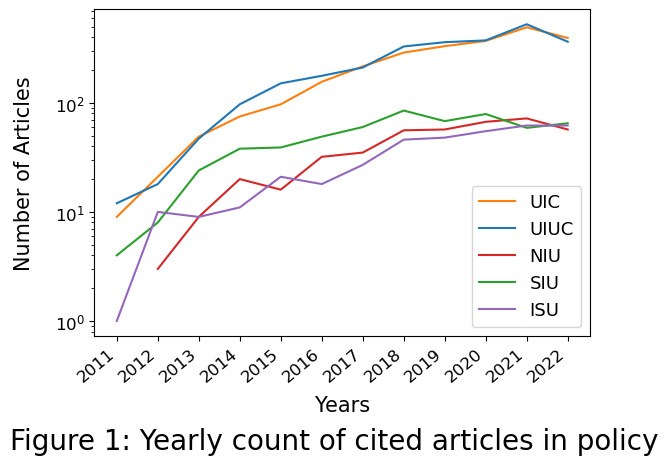

In [55]:
from matplotlib.ticker import ScalarFormatter

# Drop duplicates in the "Title" column
UIC = UIC.drop_duplicates(subset="Title")
UIUC = UIUC.drop_duplicates(subset="Title")
NIU = NIU.drop_duplicates(subset="Title")
SIU = SIU.drop_duplicates(subset="Title")
ISU = ISU.drop_duplicates(subset="Title")

# Filter the data between 2011 to 2022
UIC = UIC[(UIC["Cited by year"] >= 2011) & (UIC["Cited by year"] <= 2022)]
UIUC = UIUC[(UIUC["Cited by year"] >= 2011) & (UIUC["Cited by year"] <= 2022)]
NIU = NIU[(NIU["Cited by year"] >= 2011) & (NIU["Cited by year"] <= 2022)]
SIU = SIU[(SIU["Cited by year"] >= 2011) & (SIU["Cited by year"] <= 2022)]
ISU = ISU[(ISU["Cited by year"] >= 2011) & (ISU["Cited by year"] <= 2022)]

# Group the data by "Cited by year" and "Title" and count the number of titles
UIC_title_count = UIC.groupby(["Cited by year"]).size()
UIUC_title_count = UIUC.groupby(["Cited by year"]).size()
NIU_title_count = NIU.groupby(["Cited by year"]).size()
SIU_title_count = SIU.groupby(["Cited by year"]).size()
ISU_title_count = ISU.groupby(["Cited by year"]).size()

# Plot the line graph for each university
# Plot the line graph for each university
plt.plot(UIC_title_count.loc[2011:2022].index, UIC_title_count.loc[2011:2022].values, color="#ff7f0e", label="UIC")
plt.plot(UIUC_title_count.loc[2011:2022].index, UIUC_title_count.loc[2011:2022].values, color="#1f77b4", label="UIUC")
plt.plot(NIU_title_count.loc[2011:2022].index, NIU_title_count.loc[2011:2022].values, color="#d62728", label="NIU")
plt.plot(SIU_title_count.loc[2011:2022].index, SIU_title_count.loc[2011:2022].values, color="#2ca02c", label="SIU")
plt.plot(ISU_title_count.loc[2011:2022].index, ISU_title_count.loc[2011:2022].values, color="#9467bd", label="ISU")


# Set the x-label, y-label, and title of the graph
plt.xlabel('Years', fontsize=15, labelpad=8)
plt.ylabel('Number of Articles', fontsize=15, labelpad=15)
plt.xticks(range(2011, 2023))
plt.yticks(fontsize=12)
plt.xticks(rotation=40, ha="right", fontsize=12)


# Set the title at the bottom of the graph
plt.suptitle("Figure 1: Yearly count of cited articles in policy", y=0.01, fontsize=20)

# Adjust spacing for title at the bottom
plt.subplots_adjust(bottom=0.2)

# Show the legend and the graph
plt.legend(bbox_to_anchor=(1, 0), loc='lower right', fontsize=13)
#plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{x/1000:.1f}k'))
plt.yscale('log')
plt.show()


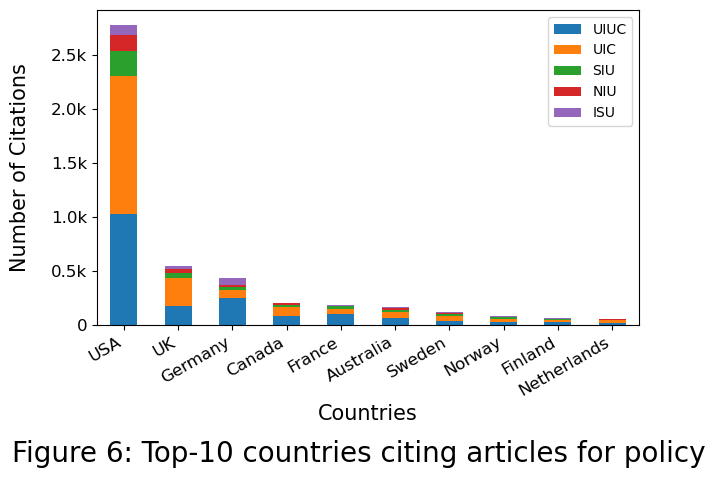

In [49]:
# concatenate dataframes into a single dataframe
df_all = pd.concat([UIC, UIUC, NIU, SIU, ISU])
#df_all = pd.concat([ISU, NIU, SIU, UIC, UIUC])
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']
#colors = ['#9467bd', '#d62728', '#2ca02c', '#ff7f0e', '#1f77b4']
df_all = df_all[df_all['Cited by country'].isin(['IGO', 'EU']) == False]
# group by Cited by country and University, and count the number of occurrences
df_counts = df_all.groupby(['Cited by country', 'University']).size().unstack()
df_counts.columns=pd.CategoricalIndex(df_counts.columns.values, ordered=True, categories=['UIUC','UIC','SIU', 'NIU', 'ISU'])
df_counts=df_counts.sort_index(axis=1)
# sort by sum of counts for each country and select only top 10 countries
top_countries = df_counts.sum(axis=1).sort_values(ascending=False).head(10).index

df_counts = df_counts.loc[top_countries]



# plot stacked bar graph
ax = df_counts.plot(kind='bar', stacked=True, figsize=(7,5), width=0.5, color = colors)

# set title and labels for the plot
ax.set_xlabel('Countries', fontsize=15)
ax.set_ylabel('Number of Citations', fontsize=15, labelpad=15)
plt.xticks(rotation=30, ha="right", fontsize=12)
plt.yticks(fontsize=12)
plt.suptitle("Figure 6: Top-10 countries citing articles for policy", y=0.02, fontsize=20)

# Adjust spacing for title at the bottom
plt.subplots_adjust(bottom=0.25)
# show the plot
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, pos: f'{int(y):,}' if y < 500 else f'{y/1000:.1f}k'))
#plt.yscale('log')
# import matplotlib.patches as mpatches

# yes1_instance = mpatches.Patch(color='#9467bd', label='ISU')
# no1_instance = mpatches.Patch(color='#d62728', label='NIU')
# yes2_instance = mpatches.Patch(color='#2ca02c', label='SIU')
# no2_instance = mpatches.Patch(color='#ff7f0e', label='UIC')
# no3_instance = mpatches.Patch(color='#1f77b4', label='UIUC')

# # Rearrange the order of the handles
# handles = [yes1_instance, no1_instance, yes2_instance, no2_instance, no3_instance]
# '#1f77b4': a shade of blue
# '#ff7f0e': a shade of orange
# '#2ca02c': a shade of green
# '#d62728': a shade of red
# '#9467bd': a shade of purple

# plt.legend(handles=handles, fontsize=10)

plt.legend(fontsize=10)
plt.show()